### Logistic Regression
Medium from Amber:

https://medium.com/@qempsil0914/courseras-machine-learning-notes-week3-classification-problem-logistic-regression-and-d5792753f8d6

Coursera (Andrew Ng):

https://www.coursera.org/learn/machine-learning#about

# **What is Logistic Regression ?**

In statistics, the (binary) logistic model (or logit model) is a statistical model that models the probability of one event (out of two alternatives) taking place by having the log-odds (the logarithm of the odds) for the event be a linear combination of one or more independent variables ("predictors"). In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). Formally, in binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. 


[Reference - https://en.wikipedia.org/wiki/Logistic_regression]

Logistic_Regression_Example.png

## Classification Problem

### Hypothesis function

Since the label type is different from Regression Problem, we should use another hypothesis for solving Classification Problem. Here, we are going to introduce a popular one - Logistic Regression

### Logistic Regression (== Sigmoid Function)

Sigmoid Function maps real numbers into probabilities, range in [0,1]

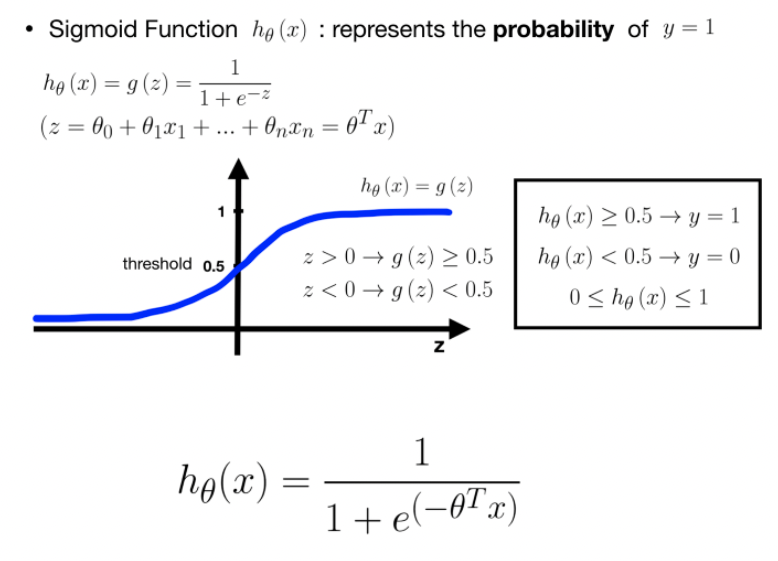

## Example - A Breast Cancer Detection Dataset, each one has two features and one label

1. Preparing Dataset

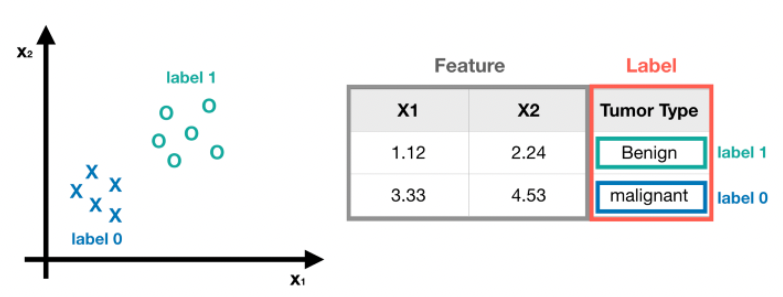

2. Getting Parameters - Get the Parameters of Logistic Regression 

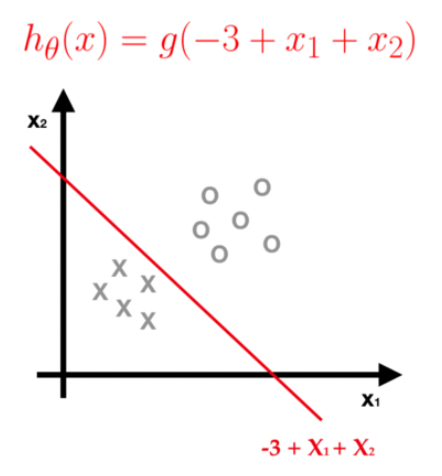

3. Predicting Labels - according to the sigmoid function with learned parameters


If the -3+x1+x2≥0, it means h(x)≥0.5, then we predict this tumor is benign (label 1).
If not, then we predict this tumor is malignant (label 0)

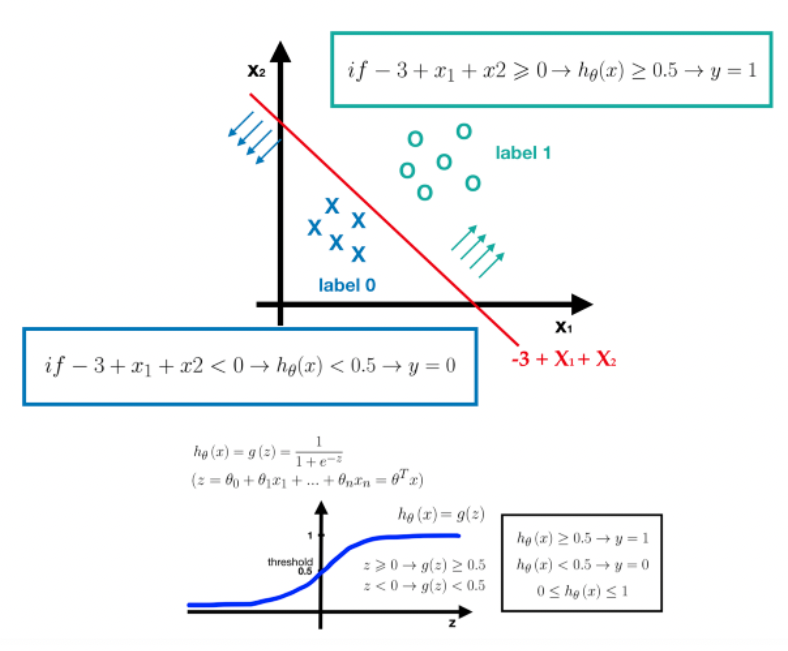

## Actication Function 'Sigmoid' 

Pytorch: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

Wikipedia: https://en.wikipedia.org/wiki/Sigmoid_function

DeepAi: https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function

스크린샷 2022-09-19 오후 3.24.50.png


sigmoid function is normally used to refer specifically to the logistic function, also called the logistic sigmoid function.
All sigmoid functions have the property that they map the entire number line into a small range such as between 0 and 1, or -1 and 1, so one use of a sigmoid function is to convert a real value into one that can be interpreted as a probability.

In [2]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

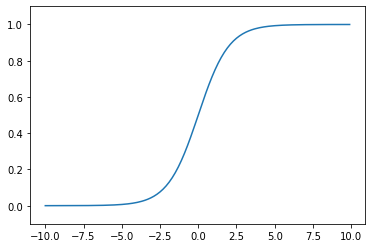

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## Cost Function 'Cross Entropy': The way to compute the error rate between labels and predictions?

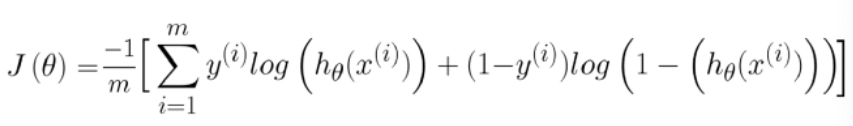

Logistic Regression with Cross Entropy (cost function) 

https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_2_Cross_entropy.html

In [1]:
def get_cross_entorpy_loss(y_table, t_entropy, t_table):
    y_prob = list(y_table.values())
    t_prob = list(t_table.values())
    y_entropy_list = list(t_prob * -np.log2(y_prob))


    y_entropy_dict = dict(zip(list(t_table.keys()),list(y_entropy_list)))
    y_entropy_val = sum(y_entropy_list) 

    cross_entropy_loss = y_entropy_val - t_entropy
    return y_entropy_dict, y_entropy_val, cross_entropy_loss

## Gradient Descend 
 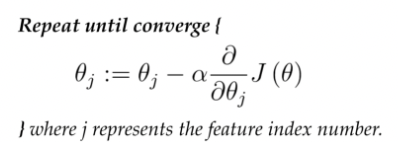

## Practice Logistic Regression with torch.nn

In [ ]:
import torch.nn as nn
import torch 

class NN_Model(nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(NN_Model, self).__init__()
        self.linear = nn.Linear(1,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        y_pred = self.sigmoid(y_pred)
        return y_pred

In [ ]:
x_data = torch.Tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.Tensor([[0.], [0.], [1.], [1.]])

In [ ]:
model = NN_Model()

In [ ]:
criterion = nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
# Training loop
epochs = 10000
for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)

    if epoch % 1000 == 0:
            print('Epoch {:4d}/{} Loss: {:.6f}'.format(
                epoch, epochs, loss.item()
            ))
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch    0/10000 Loss: 0.228407
Epoch 1000/10000 Loss: 0.205869
Epoch 2000/10000 Loss: 0.188302
Epoch 3000/10000 Loss: 0.174124
Epoch 4000/10000 Loss: 0.162368
Epoch 5000/10000 Loss: 0.152412
Epoch 6000/10000 Loss: 0.143835
Epoch 7000/10000 Loss: 0.136342
Epoch 8000/10000 Loss: 0.129721
Epoch 9000/10000 Loss: 0.123812


In [ ]:
# After training
hour_var = torch.Tensor([[1.0]])
threshold = 0.5
print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > threshold)
hour_var = torch.Tensor([[7.0]])
print("predict 7 hours", 7.0, model(hour_var).data[0][0] > threshold)

predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(True)


## Exercise : Build the Classification Model which could predict Diabetes from Quantitative Signs

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv', header=None)
df

0         1         2         3         4         5         6  \
0   -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1   -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2   -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3   -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4    0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   
..        ...       ...       ...       ...       ...       ...       ...   
754  0.176471  0.015075  0.245902 -0.030303 -0.574468 -0.019374 -0.920581   
755 -0.764706  0.226131  0.147541 -0.454545  0.000000  0.096870 -0.776260   
756 -0.411765  0.216080  0.180328 -0.535354 -0.735225 -0.219076 -0.857387   
757 -0.882353  0.266332 -0.016393  0.000000  0.000000 -0.102832 -0.768574   
758 -0.882353 -0.065327  0.147541 -0.373737  0.000000 -0.093890 -0.797609   

            7  8  
0   -0.033333  0  
1   -0.666667  1  
2   -0.633333  0  
3    0.000000  1  
4   -0.600000  0  
..        ... ..  
754  0.400000  1  
755 -0.800000  1  
756 -0.700000  1  
757 -0.133333  0  
758 -0.933333  1  

[759 rows x 9 columns]

In [ ]:
inputs = torch.from_numpy(df[[i for i in range(8)]].values).float()
print(inputs.size())
labels = torch.from_numpy(df[[8]].values).float()
print(labels.size())

torch.Size([759, 8])
torch.Size([759, 1])


In [ ]:
import torch.nn as nn
import torch 

class NN_Model(nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(NN_Model, self).__init__()
        self.linear = nn.Linear(8,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        y_pred = self.sigmoid(y_pred)
        return y_pred

In [ ]:
model = NN_Model()
criterion = nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [ ]:
# Training loop
epochs = 100000
for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, labels)

    if epoch % 1000 == 0:
            print('Epoch {:4d}/{} Loss: {:.6f}'.format(
                epoch, epochs, loss.item()
            ))
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch    0/100000 Loss: 0.671080
Epoch 1000/100000 Loss: 0.588676
Epoch 2000/100000 Loss: 0.566104
Epoch 3000/100000 Loss: 0.549196
Epoch 4000/100000 Loss: 0.536121
Epoch 5000/100000 Loss: 0.525844
Epoch 6000/100000 Loss: 0.517643
Epoch 7000/100000 Loss: 0.511010
Epoch 8000/100000 Loss: 0.505580
Epoch 9000/100000 Loss: 0.501090
Epoch 10000/100000 Loss: 0.497342
Epoch 11000/100000 Loss: 0.494188
Epoch 12000/100000 Loss: 0.491515
Epoch 13000/100000 Loss: 0.489235
Epoch 14000/100000 Loss: 0.487279
Epoch 15000/100000 Loss: 0.485593
Epoch 16000/100000 Loss: 0.484131
Epoch 17000/100000 Loss: 0.482860
Epoch 18000/100000 Loss: 0.481749
Epoch 19000/100000 Loss: 0.480775
Epoch 20000/100000 Loss: 0.479918
Epoch 21000/100000 Loss: 0.479162
Epoch 22000/100000 Loss: 0.478492
Epoch 23000/100000 Loss: 0.477898
Epoch 24000/100000 Loss: 0.477368
Epoch 25000/100000 Loss: 0.476895
Epoch 26000/100000 Loss: 0.476472
Epoch 27000/100000 Loss: 0.476093
Epoch 28000/100000 Loss: 0.475752
Epoch 29000/100000 Loss:

## Ablation : How to optimize Neural Network? 

1. Use Activation Function 

2. Build More Deeper Neural Network

3. Build Tremendous Parameters


### Other Non-linear Activations are here !! 

https://pytorch.org/docs/stable/nn.html

BCEWithLogitsLoss 

https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

In [ ]:
class RELU_MODEL(nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(RELU_MODEL, self).__init__()
        self.linear = nn.Linear(8,1)
        self.relu = nn.ReLU()
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        y_pred = self.relu(y_pred)
        return y_pred

In [ ]:
model = RELU_MODEL()
criterion = nn.BCEWithLogitsLoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
# Training loop
epochs = 100000
for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, labels)

    if epoch % 1000 == 0:
            print('Epoch {:4d}/{} Loss: {:.6f}'.format(
                epoch, epochs, loss.item()
            ))
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## More Deeper Network Could be Possible ! (Let's do Deep Learning!)

In [ ]:
class DEEP_MODEL(nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(DEEP_MODEL, self).__init__()
        self.linear = nn.Linear(8,512)
        self.linear2 = nn.Linear(512, 512)
        self.linear3 = nn.Linear(512, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.relu(self.linear(x))
        out2 = self.relu(self.linear2(out1))
        y_pred = self.relu(self.linear3(out2))
        return y_pred

In [ ]:
model = DEEP_MODEL()
criterion = nn.BCEWithLogitsLoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# Training loop
epochs = 100000
for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, labels)

    if epoch % 100 == 0:
            print('Epoch {:4d}/{} Loss: {:.6f}'.format(
                epoch, epochs, loss.item()
            ))
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch    0/100000 Loss: 0.684004
Epoch  100/100000 Loss: 0.537911
Epoch  200/100000 Loss: 0.511440
Epoch  300/100000 Loss: 0.503048
Epoch  400/100000 Loss: 0.497255
Epoch  500/100000 Loss: 0.493803
Epoch  600/100000 Loss: 0.490693
Epoch  700/100000 Loss: 0.488157
Epoch  800/100000 Loss: 0.486049
Epoch  900/100000 Loss: 0.484024
Epoch 1000/100000 Loss: 0.482231
Epoch 1100/100000 Loss: 0.480546
Epoch 1200/100000 Loss: 0.478897
Epoch 1300/100000 Loss: 0.477111
Epoch 1400/100000 Loss: 0.475367
Epoch 1500/100000 Loss: 0.473634
Epoch 1600/100000 Loss: 0.471924
Epoch 1700/100000 Loss: 0.470233
Epoch 1800/100000 Loss: 0.468572
Epoch 1900/100000 Loss: 0.466998
Epoch 2000/100000 Loss: 0.465530
Epoch 2100/100000 Loss: 0.464131
Epoch 2200/100000 Loss: 0.462839
Epoch 2300/100000 Loss: 0.461405
Epoch 2400/100000 Loss: 0.460054
Epoch 2500/100000 Loss: 0.458761
Epoch 2600/100000 Loss: 0.457359
Epoch 2700/100000 Loss: 0.455775
Epoch 2800/100000 Loss: 0.454294
Epoch 2900/100000 Loss: 0.452799
Epoch 3000

KeyboardInterrupt: ignored